# Transitions Demo

This notebook introduces you to Tal Yarkoni's `transitions` module, and much of this notebook
is taken from the start of excellent set of examples in [the github repository readme](https://github.com/pytransitions/transitions#diagrams) for the module.

This module is very lightweight (unlike many graph and finite state packages) and installable with 
`conda install` or `pip install`.

## Using transitions

This demo is simply a notebook adapted from the [transitions Github README page.](https://github.com/pytransitions/transitions)  with afew small addons to support
language processing.

The has been updated for notebook display, by  extending the link to `graphviz.agraph` objects,
which uses the `to_graph()` method, to `graphviz.Source` objects which support the `._repr_mimebundle_()`
method and know how to display themselves in a notebook.

## Example one:  sheep language (with punctuation!)

This beautifully minimal "language" is from Jurafsky and Martin  (*Speech and Language Processing*).

In [1]:
from transitions import MachineError

import random
import graphviz
try:
  import pygraphviz
  from transitions.extensions import GraphMachine as Machine
  pygraphviz_available = True
except ModuleNotFoundError:
  from transitions import Machine
  pygraphviz_available = False


class SheepLanguage(object):

    # Define some states. 
    # Start will be the init state.
    states = ['Start','b', 'a1', 'a2','End']
    accept = False
    source = None
    
    def __init__ (self):
        self.initialize()
        self.init_display()

    def initialize(self):


        # How many instance of the letter "a" have we seen?
        self.as_seen = 0

        # Initialize the state machine
        self.machine = Machine(model=self, states=SheepLanguage.states, initial='Start')

        # Add some transitions. We could also define these using a static list of
        # dictionaries, as we did with states above, and then pass the list to
        # the Machine initializer as the transitions= argument.

        # See b in start state
        self.machine.add_transition(trigger='b', source='Start', dest='b')

        # See first a in b state
        self.machine.add_transition('a', 'b', 'a1')

        # See second a in a1 state
        self.machine.add_transition('a', 'a1', 'a2')

        # See a in a2 state
        self.machine.add_transition('a','a2','a2')
        
        # See ! in a2 state
        self.machine.add_transition('!','a2','End', after='accept_string')

    def accept_string(self):
        """ Everything is good. """
        self.accept = True
        return self.accept
        
    def reject_string(self):
        """ Everything is bad. """
        self.accept = False
        return self.accept
        
    def consume_string (self, in_str,verbose=False):
        for c in in_str:
            try:
               getattr(self,c)()
               if verbose:
                  print(self.state)
            except MachineError:
               return self.reject_string()
        return self.accept
    
    def init_display(self):
        """
        Needs to be re-executed if the graph is altered.
        """
        if pygraphviz_available:
            self.source = graphviz.Source(self.get_graph().to_string())
            # This is the attribute tht contains self display info
            self._repr_mimebundle_ = self.source._repr_mimebundle_
            return None

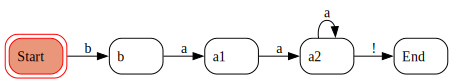

In [2]:
sl = SheepLanguage()
sl
# Uncomment this to get your sheep network drawn & saved as a file.
#sl.get_graph().draw('sheep_language.png', prog='dot')

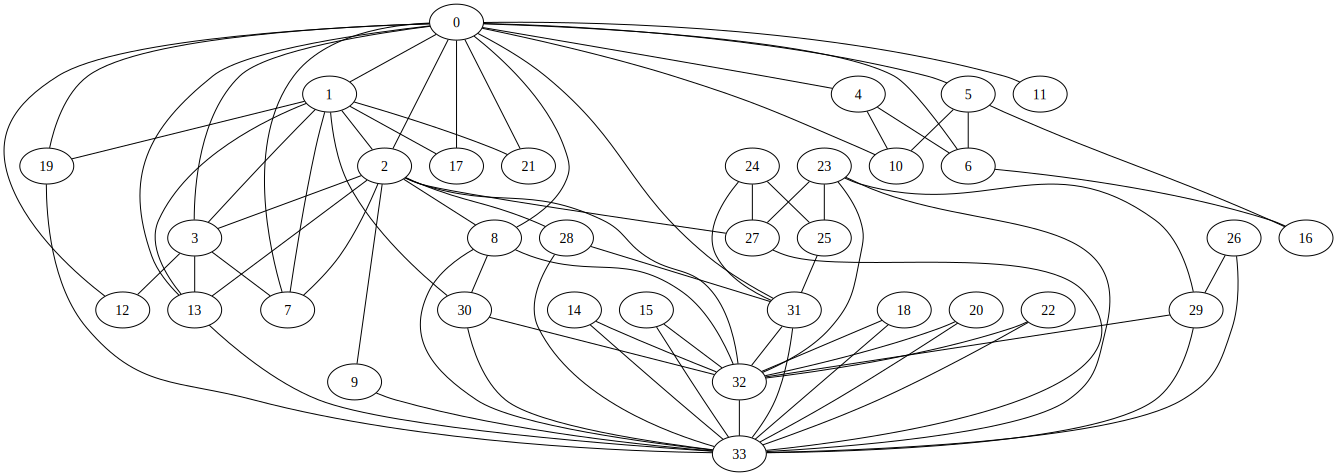

In [9]:
import networkx as nx
kg = nx.karate_club_graph()
akg = nx.nx_agraph.to_agraph(kg)  
graphviz.Source(akg.to_string())

In [7]:
dir(kg)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__networkx_cache__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 '

In [3]:
sl.b()

True

In [4]:
sl.state

'b'

In [6]:
sl.b()

MachineError: "Can't trigger event b from state b!"

In [7]:
sl.a()

True

In [8]:
sl.accept

False

In [9]:
sl.a()

True

In [10]:
sl.accept

False

In [11]:
# sl.!()  is a Python syntax error, because '!' is not a legal 1st char for a name
getattr(sl,'!')()

True

In [12]:
sl.accept

True

In [23]:
#getattr(sl,'!')()
#MachineError: "Can't trigger event ! from state End!"

### Consuming strings

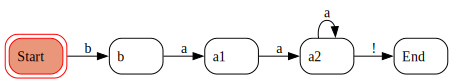

In [14]:
sl

In [34]:
sl = SheepLanguage()
sl.consume_string('baa!',verbose=True)

b
a1
a2
End


True

In [16]:
sl = SheepLanguage()
sl.consume_string('baaaa!')

True

In [17]:
sl = SheepLanguage()
sl.consume_string('ba!')

False

In [36]:
sl = SheepLanguage()
sl.consume_string('baa!a',verbose=True)

b
a1
a2
End


False

In [19]:
sl = SheepLanguage()
sl.consume_string('baa')

False

Summary:  Instances of the `SheepLanguage` class **define a language**. If a string is in the language,
the machine consumes it; if not, not.

In fact the language can be written as a regular expression:

$$
\text{ba}^{+}!
$$

Accept a `b` followed by one or more `a`s followed by a `!`.  Accept no other strings.

## Superhero state machine

Next a non-linguistic example.

In [25]:
from transitions import MachineError
import random
import graphviz

try:
  import pygraphviz
  from transitions.extensions import GraphMachine as Machine
  pygraphviz_available = True
except ModuleNotFoundError:
  from transitions import Machine
  pygraphviz_available = False


class NarcolepticSuperhero(object):

    # Define some states. Most of the time, narcoleptic superheroes are just like
    # everyone else. Except for...
    # asleep will be the init state.
    states = ['asleep', 'hanging out', 'hungry', 'sweaty', 'saving the world']
    
    def __init__ (self,name):
        self._initialize(name)
        self._init_display()

    def _initialize(self, name):

        # No anonymous superheroes on my watch! Every narcoleptic superhero gets
        # a name. Any name at all. SleepyMan. SlumberGirl. You get the idea.
        self.name = name

        # What have we accomplished today?
        self.kittens_rescued = 0

        # Initialize the state machine
        self.machine = Machine(model=self, states=NarcolepticSuperhero.states, initial='asleep')

        # Add some transitions. We could also define these using a static list of
        # dictionaries, as we did with states above, and then pass the list to
        # the Machine initializer as the transitions= argument.

        # At some point, every superhero must rise and shine.
        self.machine.add_transition(trigger='wake_up', source='asleep', dest='hanging out')

        # Superheroes need to keep in shape.
        self.machine.add_transition('work_out', 'hanging out', 'hungry')

        # Those calories won't replenish themselves!
        self.machine.add_transition('eat', 'hungry', 'hanging out')

        # Superheroes are always on call. ALWAYS. But they're not always
        # dressed in work-appropriate clothing.
        self.machine.add_transition('distress_call', '*', 'saving the world',
                         before='change_into_super_secret_costume')

        # When they get off work, they're all sweaty and disgusting. But before
        # they do anything else, they have to meticulously log their latest
        # escapades. Because the legal department says so.
        self.machine.add_transition('complete_mission', 'saving the world', 'sweaty',
                         after='update_journal')

        # Sweat is a disorder that can be remedied with water.
        # Unless you've had a particularly long day, in which case... bed time!
        self.machine.add_transition('clean_up', 'sweaty', 'asleep', conditions=['is_exhausted'])
        self.machine.add_transition('clean_up', 'sweaty', 'hanging out')

        # Our NarcolepticSuperhero can fall asleep at pretty much any time.
        self.machine.add_transition('nap', '*', 'asleep')

    def update_journal(self):
        """ Dear Diary, today I saved Mr. Whiskers. Again. """
        self.kittens_rescued += 1

    @property
    def is_exhausted(self):
        """ Basically a coin toss. """
        return random.random() < 0.5

    def change_into_super_secret_costume(self):
        print("Beauty, eh?")
        
    def _init_display(self):
        """
        Needs to be re-exceuted if the graph is altered.
        """
        if pygraphviz_available:
            self.source = graphviz.Source(self.get_graph().to_string())
            self._repr_mimebundle_ = self.source._repr_mimebundle_
            return None

There, now you've baked a state machine into NarcolepticSuperhero. Let's take him/her/it out for a spin...

In [26]:
batman = NarcolepticSuperhero("Batman")
batman.state
'asleep'

'asleep'

In [27]:
batman.wake_up()
batman.state
'hanging out'

'hanging out'

In [28]:
batman.nap()
batman.state
'asleep'

'asleep'

In [17]:
#batman.clean_up()
#MachineError: "Can't trigger event clean_up from state asleep!"

In [30]:
batman.wake_up()
batman.work_out()
batman.state
#'hungry'

'hungry'

In [31]:
# Batman still hasn't done anything useful...
batman.kittens_rescued
#0

0

In [32]:
# We now take you live to the scene of a horrific kitten entreement...
batman.distress_call()
#'Beauty, eh?'

Beauty, eh?


True

In [33]:
batman.state
#'saving the world'

'saving the world'

In [34]:
# Back to the crib.
batman.complete_mission()
batman.state
#'sweaty'

'sweaty'

In [35]:
batman.clean_up()
batman.state
#'asleep'   # Too tired to shower!

'hanging out'

In [36]:
# Another productive day, Alfred.
batman.kittens_rescued
#1

1

In [37]:
batman.is_exhausted

True

But what is batman really?

Note this will behave very differently if `pygraphviz` is not working  (and it won't be working in a Colab
notebook).

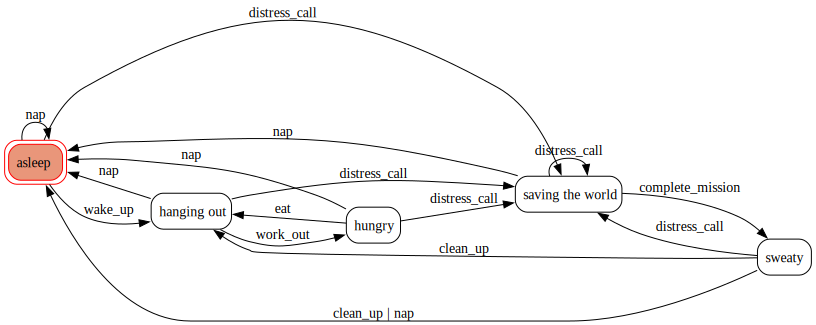

In [38]:
batman

Have a look at the Diagrams extentions if you want to know how outputting the above image works.

Summary:  the `batman` machine defines a state machine.  It has a set of states and recognizes a certain set of events that transition it from one state to another.   It has an initial state and computations
it executes before and after transitions.  It doesn't have a `consume_string` method
because it doesn't need one.  That's not the sort of thing it does.  But it implements what is recognizably the same computational model as the `SheepLanguage` machine.  You could implement a large variety of pipeline
systems with the same computational model, as well as systems with forks and loops.  

There is a great deal more that could be said about **finite-state machines**, which is what we're talking 
about (and a great deal more to the `transitions`-module, on which see the docs), but this is an important example of a **model of computation**.  It introduces two very basic computational concepts, **states** and **events**
and uses a very simple model of how they're related. It has its limitations.  The set of states has to be finite.  There's no built-in notion of history.  A transition depends on the event and the state we're in. For example, we couldn't build a transition-machine to recognize a dialect of sheep langauge in which there had to be exactly as many `!`s as there are `a`s, because that would require remembering how many `a`s we'd seen when we started seeing `!`s.  We could of course implement methoids that would do that counting and do the rejecting when the counts
don;t come out right, but that would be adding something over and above the computational model that
the `trabnsitions` model implements.

## Exercise:  Matter-state state machine

Note one important difference between the the two examples: the `SheepLanguage` machine has what is called a **sink state**.  Once you've seen an `!` there is nothing more that can happen, because no transitions leave the `!`-state.  The `batman` machine has no state corresponding to that.  You can keep looping around
from state to state forever. 

Here's another finite-state machine, `Matter`.  Answer the following questions.

1.  Is `Matter` a pipeline or does it have forks?   Are there any loops?
2.  Does `Matter` have a sink state?  If it does, define something analogous to a `.consume_string()` method
    that accepts or rejects event sequences depending on whether they end up in the sink state (you
    will be using the sink state as an accept state).
3.  The `Matter` class allows defining machines that have different initial states.  Do two `Matter`
    machines with different initial states (see the examples below) accept different sets of event sequences?
    Give examples, using two `Matter` machines with a different initial states and at least two 
    relevant event sequences.
4.  Generalize the code accepting and rejecting event sequences so that any state, not just the sink state, can   
    the accept state. You will have to stipulate the accept state in the class definition of `Matter` 
    (after the assignment `states =` place a new assignment `final_state =`).  Test with both `liquid`
    and `solid` as final state

In [14]:
from transitions import MachineError
import random
import graphviz

try:
  import pygraphviz
  from transitions.extensions import GraphMachine as Machine
  pygraphviz_available = True
except ModuleNotFoundError:
  from transitions import Machine
  pygraphviz_available = False


class Matter(object):
    
    states=['solid', 'liquid','gas', 'plasma']
 
    def __init__ (self,name,initial="solid"):
        self._initialize(name,initial)
        self._init_display()

    def _initialize(self, name,initial):

        self.name = name
 
        # Initialize the state machine
        self.machine = Machine(model=self, states=Matter.states, initial=initial)
    
        self.machine.add_transition(trigger='melt', source='solid', dest='liquid')
        self.machine.add_transition(trigger='sublimate', source='solid', dest='gas')
        self.machine.add_transition(trigger='antisublimate', source='gas', dest='solid')
        self.machine.add_transition(trigger='evaporate', source='liquid', dest='gas', after='do_something')
        self.machine.add_transition(trigger='ionize', source='gas', dest='plasma')
        
    def do_something (self):
        """
        Example of an after method!
        """
        print("I'm feeling gassy!")
      
    def _init_display(self):
        """
        Needs to be re-exceuted if the graph is altered.
        """
        if pygraphviz_available:
            self.source = graphviz.Source(self.get_graph().to_string())
            self._repr_mimebundle_ = self.source._repr_mimebundle_
            return None



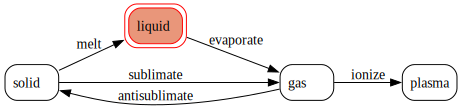

In [15]:
puddle_37 = Matter('puddle_37',initial="liquid")
puddle_37

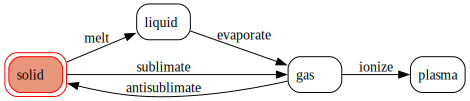

In [16]:
lump_38 = Matter('lump_38',initial="solid")
lump_38

In [17]:
lump_38.melt()

True

In [18]:
lump_38.evaporate()

I'm feeling gassy!


True

### Exercise solution

In [19]:

class Matter23(object):
    
    states=['solid', 'liquid', 'gas', 'plasma']
    
    accept = False

    def __init__ (self,name,initial="liquid"):
        self._initialize(name,initial)
        self._init_display()

    def _initialize(self, name,initial):

        self.name = name
 
        # Initialize the state machine
        self.machine = Machine(model=self, states=Matter.states, initial=initial)
               
        self.machine.add_transition(trigger='melt', source='solid', dest='liquid')
        self.machine.add_transition(trigger='sublimate', source='solid', dest='gas')
        self.machine.add_transition(trigger='antisublimate', source='gas', dest='solid')
        self.machine.add_transition(trigger='evaporate', source='liquid', dest='gas')
        self.machine.add_transition(trigger='ionize', source='gas', dest='plasma', after='accept_sequence')
        
    def accept_sequence (self):
        self.accept = True
        return self.accept
    
    def reject_sequence (self):
        self.accept = False
        return self.accept
       
    def _init_display(self):
        """
        Needs to be re-exceuted if the graph is altered.
        """
        if pygraphviz_available:
            self.source = graphviz.Source(self.get_graph().to_string())
            self._repr_mimebundle_ = self.source._repr_mimebundle_
            return None


    def consume_events (self, event_list):
        for event  in event_list:
            try:
                getattr(self, event)()
            except:
                print("Reject:",self.state, "don't", event)
                return self.reject_sequence()
        # Note this cant be self.accept_sequence()
        # because we want to reject ["melt","evaporate"]
        # which does not end in a final state.
        return self.accept
            
                

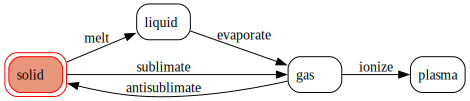

In [20]:
lump18 = Matter23("lump18", initial="solid")
lump18

Different initial states do result in different sets of accepted sequences.  For instance:

In [25]:
lump18 = Matter23("lump18", initial="solid")
seq1 = ["melt","evaporate","ionize"]

lump18.consume_events(seq1)

True

In [27]:
lump18 = Matter23("lump18", initial="solid")
seq2 = ["melt","evaporate","antisublimate", "sublimate", "ionize"]
lump18.consume_events(seq2)

True

In [22]:
lump19 = Matter23("lump18", initial="liquid")
lump19.consume_events(seq1)

Reject: liquid don't melt


False

In [48]:
class Matter24(object):
    
    states=['solid', 'liquid', 'gas', 'plasma']
    
    accept = False
    final_state = "liquid"

    def __init__ (self,name,initial="liquid",final="liquid"):
        self._initialize(name,initial)
        self._init_display()

    def _initialize(self, name,initial):

        self.name = name
 
        # Initialize the state machine
        self.machine = Machine(model=self, states=Matter.states, initial=initial)
               
        self.machine.add_transition(trigger='melt', source='solid', dest='liquid')
        self.machine.add_transition(trigger='sublimate', source='solid', dest='gas')
        self.machine.add_transition(trigger='antisublimate', source='gas', dest='solid')
        self.machine.add_transition(trigger='evaporate', source='liquid', dest='gas', after='accept_sequence')
        self.machine.add_transition(trigger='ionize', source='gas', dest='plasma')
        
    def accept_sequence (self):
        self.accept = True
        return self.accept
    
    def reject_sequence (self):
        self.accept = False
        return self.accept

       
    def _init_display(self):
        """
        Needs to be re-exceuted if the graph is altered.
        """
        if pygraphviz_available:
            self.source = graphviz.Source(self.get_graph().to_string())
            self._repr_mimebundle_ = self.source._repr_mimebundle_
            return None


    def consume_events (self, event_list,verbose=False):
        for event  in event_list:
            try:
                getattr(self, event)()
                if verbose:
                    print(f"{event} {self.state} ")
            except:
                print("Reject:",self.state, "don't", event)
                return self.reject_sequence()
        if self.state == self.final_state:
            return self.accept_sequence()
        else:
            return self.reject_sequence()
 

In [49]:
lump20 = Matter24("lump18", initial="solid")
seq1 = ["melt","evaporate","ionize"]
lump20.consume_events(seq1)

False

In [43]:
lump21.accept

False

In [40]:
lump21.final_state

'liquid'

In [52]:
lump21  = Matter24("lump18", initial="solid")
seq2 = ["melt","evaporate","melt"]

lump21.consume_events(seq2,verbose=True)

melt liquid 
evaporate gas 
Reject: gas don't melt


False

## Diagrams  (this section works only if pygraphviz is available)

Poke around in the sheep language instance:

In [8]:
dd = sl._repr_mimebundle_()

In [10]:
sl_image = dd['image/svg+xml']

svg+xml is a very high-level (and therefore compact) object oriented  representation written in a graphic language
whose constructs include things like graphs and  (line/curve)-paths.

Here is our entire Sheep Language Machine image:

In [13]:
print(sl_image)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 12.0.0 (0)
 -->
<!-- Pages: 1 -->
<svg width="453pt" height="83pt"
 viewBox="0.00 0.00 453.25 82.50" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 78.5)">
<polygon fill="white" stroke="none" points="-4,4 -4,-78.5 449.25,-78.5 449.25,4 -4,4"/>
<!-- Start -->
<g id="node1" class="node">
<title>Start</title>
<path fill="darksalmon" stroke="red" d="M46,-40C46,-40 16,-40 16,-40 10,-40 4,-34 4,-28 4,-28 4,-16 4,-16 4,-10 10,-4 16,-4 16,-4 46,-4 46,-4 52,-4 58,-10 58,-16 58,-16 58,-28 58,-28 58,-34 52,-40 46,-40"/>
<path fill="none" stroke="red" d="M50,-44C50,-44 12,-44 12,-44 6,-44 0,-38 0,-32 0,-32 0,-12 0,-12 0,-6 6,0 12,0 12,0 50,0 50,0 56,0 62,-6 62,-12 62,-12 62,-32 62,-32 62,-38 56,-44 50,-44"/>

The `pygraphviz` module is a wrapper around `graphviz` which geared toward visualizing the graphs.  It actually
also works with `networkx` although the results aren't always as eye-popping.

> PyGraphviz is a Python interface to the Graphviz graph layout and visualization package. With PyGraphviz you can create, edit, read, write, and draw graphs using Python to access the Graphviz graph data structure and layout algorithms.

The following simple version of outputting drawings (layouts) works on the Narcoleptic superhero.
But only if pygraphviz has been successfully installed.  Note that explicit importation
of `pygraphviz`  isn't required; when you import `graphviz`, it will do the correct imports
if `pygraphviz` is available.  The code in the cells defining the `SheepLanguage` and `NarcolepticSuperhero`
classes only tries as `pygraphviz` import as a test to see whether the `initialize_display`
method should be disabled.

If using this notebook in Jupyter on local machine, just flip back to the Home tab to check out the ".png" 
or ".pdf" file that will have been saved there.

In [39]:
from transitions.extensions import GraphMachine as Machine

#m = Model()
m = NarcolepticSuperhero("Robin")
# without further arguments pygraphviz will be used
#machine = Machine(model=m)
# when you want to use graphviz explicitely
#machine = Machine(model=m, use_pygraphviz=False, ...)
# in cases where auto transitions should be visible
#machine = Machine(model=m, show_auto_transitions=True, ...)

# draw the whole graph ... and save in a .png file.
m.get_graph().draw('robin_diagram2.png', prog='dot')
# ... or just the region of interest
# (previous state, active state and all reachable states)
#roi = m.get_graph(show_roi=True).draw('my_state_diagram.png', prog='dot')

In [43]:
#graphviz Agraph instance
g = m.get_graph()
g

<AGraph <Swig Object of type 'Agraph_t *' at 0x108dbed90>>

In [24]:
print(g.draw.__doc__)

Output graph to path in specified format.

        An attempt will be made to guess the output format based on the file
        extension of `path`.  If that fails, then the `format` parameter will
        be used.

        Note, if `path` is a file object returned by a call to os.fdopen(),
        then the method for discovering the format will not work.  In such
        cases, one should explicitly set the `format` parameter; otherwise, it
        will default to 'dot'.

        If path is None, the result is returned as a Bytes object.

        Formats (not all may be available on every system depending on
        how Graphviz was built)

            'canon', 'cmap', 'cmapx', 'cmapx_np', 'dia', 'dot',
            'fig', 'gd', 'gd2', 'gif', 'hpgl', 'imap', 'imap_np',
            'ismap', 'jpe', 'jpeg', 'jpg', 'mif', 'mp', 'pcl', 'pdf',
            'pic', 'plain', 'plain-ext', 'png', 'ps', 'ps2', 'svg',
            'svgz', 'vml', 'vmlz', 'vrml', 'vtx', 'wbmp', 'xdot', 'xlib'


       

In [26]:
# create dot file from graph
#g.draw("robin_diagram2.dot", format="dot", prog="dot")

In [73]:
# Create string contents of dot file.  Note: this has layout info.
print(g.to_string())

strict digraph "" {
	graph [bb="0,0,218.86,117.62",
		rankdir=LR
	];
	node [color=black,
		fillcolor=white,
		label="\N",
		peripheries=1,
		shape=rectangle,
		style="rounded,filled"
	];
	edge [color=black];
	asleep	[color=red,
		fillcolor=darksalmon,
		height=0.72222,
		label="asleep\l",
		peripheries=2,
		pos="41.646,50.888",
		width=0.97222];
	asleep -> asleep	[label=nap,
		lp="104.4,50.888",
		pos="e,76.814,44.164 76.814,57.612 86.882,57.348 94.646,55.107 94.646,50.888 94.646,48.449 92.051,46.671 87.916,45.554"];
	"hanging out"	[height=0.5,
		label="hanging out\l",
		pos="123.54,45.875",
		width=1.1181];
	asleep -> "hanging out"	[label=wake_up,
		lp="101.35,63.673",
		pos="e,82.848,55.129 76.786,55.43 76.912,55.425 77.037,55.42 77.163,55.415"];
	"saving the world"	[height=0.5,
		label="saving the world\l",
		pos="80.731,18",
		width=1.4826];
	asleep -> "saving the world"	[label=distress_call,
		lp="110.47,19.783",
		pos="e,77.341,27.723 77.016,28.137 77.071,28.067 77.125,27.998 77.

##  From dot file to graphviz source instance

In [35]:
import graphviz
g22 = graphviz.Source.from_file("robin_diagram2.dot")

Graphviz source isn't really a graph.  It's an api for graph rendering.

In [43]:
for att in "filename engine format graph_attr node_attr edge_attr render renderer".split():
    try:
        print(getattr(g22,att))
    except:
        print (f"{att} undefined!")
        continue

robin_diagram2.dot
dot
pdf
graph_attr undefined!
node_attr undefined!
edge_attr undefined!
<bound method Render.render of <graphviz.sources.Source object at 0x1105212b0>>
None


It has the `__mime_repr__`  method needed fro rendering itself in a notebook:

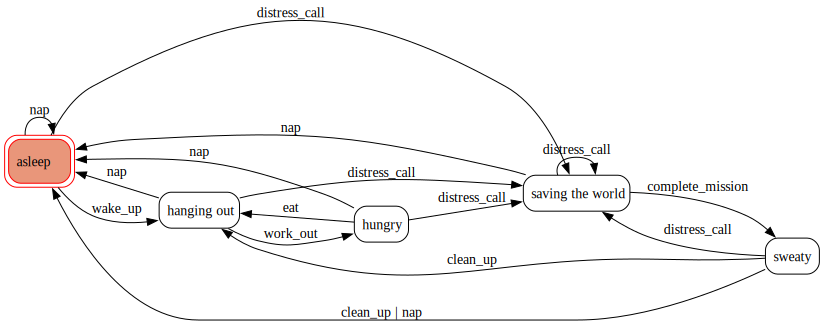

In [36]:
g22

##  From narcoleptic superhero to graphviz source instance

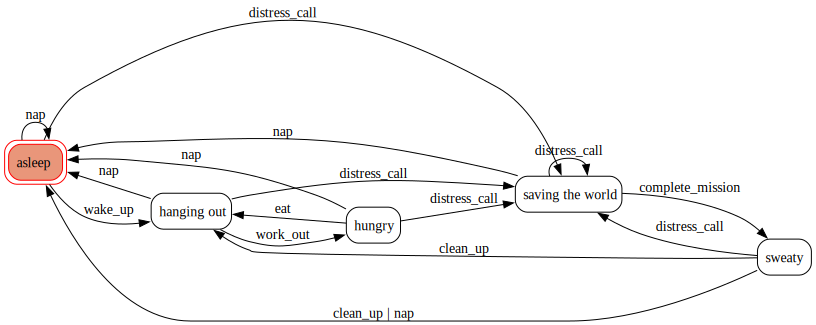

In [45]:
# m our Narcopleptic Superhero instance
# m.get_graph()  graphviz AGraph instance
# m.get_graph().to_string() String in dot language for layout of m
# g23 a graphviz source object that knows how to render itself in a Jupyter NB
g23 = graphviz.Source(m.get_graph().to_string())
g23

# A little more about the transitions module

## Basic initialization

Getting a state machine up and running is pretty simple. Let's say you have the object lump (an instance of class Matter), and you want to manage its states:

You can initialize a (minimal) working state machine bound to lump like this:

Simplifying

In [47]:

class ProtoMatter(object):
    
    pass

proto_lump = ProtoMatter()
machine = Machine(model=proto_lump, states=['solid', 'liquid', 'gas', 'plasma'], initial='solid')

# Lump now has state!
proto_lump.state
#'solid'

'solid'

I say "minimal", because while this state machine is technically operational, it doesn't actually do anything. It starts in the 'solid' state, but won't ever move into another state, because no transitions are defined... yet!

Let's try again.

In [64]:
lump = ProtoMatter()

# The states
states=['solid', 'liquid', 'gas', 'plasma']

# And some transitions between states. We're lazy, so we'll leave out
# the inverse phase transitions (freezing, condensation, etc.).
transitions = [
    { 'trigger': 'melt', 'source': 'solid', 'dest': 'liquid' },
    { 'trigger': 'evaporate', 'source': 'liquid', 'dest': 'gas' },
    { 'trigger': 'sublimate', 'source': 'solid', 'dest': 'gas' },
    { 'trigger': 'ionize', 'source': 'gas', 'dest': 'plasma' }
]

# Initialize
machine = Machine(lump, states=states, transitions=transitions, initial='solid')

# Now lump maintains state...
lump.state
#>>> 'liquid'

'solid'

In [65]:
lump.sublimate()
lump.state
#>>> 'gas'

'gas'

Boolean test for state:

In [66]:
lump.is_gas()

True

In [51]:
lump.trigger('ionize')
lump.state
#>>> 'plasma'  which is a final state

'plasma'

In [52]:
lump = ProtoMatter()
machine = Machine(lump, states=states, transitions=transitions, initial='liquid')

In [53]:
# And that state can change...
lump.evaporate()
lump.state
#>>> 'gas'

'gas'

In [54]:
lump.ionize()
lump.state
#>>> 'plasma'

'plasma'

In [55]:
lump = ProtoMatter()
machine = Machine(lump, states=states, transitions=transitions, initial='solid')
lump.trigger('melt')

True

Notice the shiny new methods attached to the Matter instance (evaporate(), ionize(), etc.). Each method triggers the corresponding transition. You don't have to explicitly define these methods anywhere; the name of each transition is bound to the model passed to the Machine initializer (in this case, lump). To be more precise, your model should not already contain methods with the same name as event triggers since transitions will only attach convenience methods to your model if the spot is not already taken. If you want to modify that behaviour, have a look at the FAQ. Furthermore, there is a method called trigger now attached to your model (if it hasn't been there before). This method lets you execute transitions by name in case dynamic triggering is required.

States
The soul of any good state machine (and of many bad ones, no doubt) is a set of states. Above, we defined the valid model states by passing a list of strings to the Machine initializer. But internally, states are actually represented as State objects.

You can initialize and modify States in a number of ways. Specifically, you can:

pass a string to the Machine initializer giving the name(s) of the state(s), or
directly initialize each new State object, or
pass a dictionary with initialization arguments
The following snippets illustrate several ways to achieve the same goal:

In [59]:
# import Machine and State class
from transitions import State

# Create a list of 3 states to pass to the Machine
# initializer. We can mix types; in this case, we
# pass one State, one string, and one dict.
states = [
    State(name='solid'),
    'liquid',
    { 'name': 'gas'}
    ]
lump = ProtoMatter()
machine = Machine(lump, states)

# This alternative example illustrates more explicit
# addition of states and state callbacks, but the net
# result is identical to the above.
lump = ProtoMatter()
machine = Machine(lump)
solid = State('solid')
liquid = State('liquid')
gas = State('gas')
machine.add_states([solid, liquid, gas])

States are initialized once when added to the machine and will persist until they are removed from it. In other words: if you alter the attributes of a state object, this change will NOT be reset the next time you enter that state. Have a look at how to extend state features in case you require some other behaviour.

Callbacks
A State can also be associated with a list of enter and exit callbacks, which are called whenever the state machine enters or leaves that state. You can specify callbacks during initialization, or add them later.

For convenience, whenever a new State is added to a Machine, the methods on_enter_«state name» and on_exit_«state name» are dynamically created on the Machine (not on the model!), which allow you to dynamically add new enter and exit callbacks later if you need them.

In [72]:
# Our old ProtoMatter class, now with  a couple of new methods we
# can trigger when entering or exit states.
class ProtoMatter(object):
    def say_hello(self): print("hello, new state!")
    def say_goodbye(self): print("goodbye, old state!")

lump = ProtoMatter()

# Same states as above, but now we give StateA an exit callback
states = [
    State(name='solid', on_exit=['say_goodbye']),
    'liquid',
    { 'name': 'gas' }
    ]

machine = Machine(lump, states=states)
machine.add_transition('sublimate', 'solid', 'gas')

# Callbacks can also be added after initialization using
# the dynamically added on_enter_ and on_exit_ methods.
# Note that the initial call to add the callback is made
# on the Machine and not on the model.
machine.on_enter_gas('say_hello')

# Test out the callbacks...
machine.set_state('solid')
lump.sublimate()
#>>> 'goodbye, old state!'
#>>> 'hello, new state!'

goodbye, old state!
hello, new state!


True

Note that on_enter_«state name» callback will not fire when a Machine is first initialized. For example if you have an on_enter_A() callback defined, and initialize the Machine with initial='A', on_enter_A() will not be fired until the next time you enter state A. (If you need to make sure on_enter_A() fires at initialization, you can simply create a dummy initial state and then explicitly call to_A() inside the __init__ method.)

In addition to passing in callbacks when initializing a State, or adding them dynamically, it's also possible to define callbacks in the model class itself, which may increase code clarity. For example:

In [77]:
class ABC(object):
    def say_hello(self): print("hello, new state!")
    def say_goodbye(self): print("goodbye, old state!")
    def on_enter_A(self): print("We've just entered state A!")

lump = ABC()
machine = Machine(lump, states=['A', 'B', 'C'],initial="A")

Now, any time lump transitions to state A, the on_enter_A() method defined in the Matter class will fire.

Checking state
You can always check the current state of the model by either:

inspecting the .state attribute, or
calling is_«state name»()
And if you want to retrieve the actual State object for the current state, you can do that through the Machine instance's get_state() method.

In [78]:
lump.state
#>>> 'initial'

'A'

In [79]:
lump.is_A()
#>>> False

True

In [80]:
machine.get_state(lump.state).name
#>>> 'initial'

'A'

If you'd like you can choose your own state attribute name by passing the model_attribute argument while initializing the Machine. This will also change the name of is_«state name»() to is_«model_attribute»_«state name»() though. Similarly, auto transitions will be named to_«model_attribute»_«state name»() instead of to_«state name»(). This is done to allow multiple machines to work on the same model with individual state attribute names.

In [87]:
lump = ProtoMatter()
machine = Machine(lump, states=['solid', 'liquid', 'gas'],  model_attribute='matter_state', initial='solid')
lump.matter_state
#>>> 'solid'

'solid'

In [88]:
# with a custom 'model_attribute', states can also be checked like this:
lump.is_matter_state_solid()
#>>> True

True

In [89]:
lump.to_matter_state_gas()
#>>> True

True

In [90]:
lump.matter_state

'gas'

Enumerations
So far we have seen how we can give state names and use these names to work with our state machine. If you favour stricter typing and more IDE code completion (or you just can't type 'sesquipedalophobia' any longer because the word scares you) using Enumerations might be what you are looking for:

In [91]:
import enum  # Python 2.7 users need to have 'enum34' installed
from transitions import Machine

class States(enum.Enum):
    ERROR = 0
    RED = 1
    YELLOW = 2
    GREEN = 3

transitions = [['proceed', States.RED, States.YELLOW],
               ['proceed', States.YELLOW, States.GREEN],
               ['error', '*', States.ERROR]]

m = Machine(states=States, transitions=transitions, initial=States.RED)
assert m.is_RED()
assert m.state is States.RED
state = m.get_state(States.RED)  # get transitions.State object
print(state.name)  # >>> RED
m.proceed()
m.proceed()
assert m.is_GREEN()
m.error()
assert m.state is States.ERROR

RED


You can mix enums and strings if you like (e.g. [States.RED, 'ORANGE', States.YELLOW, States.GREEN]) but note that internally, transitions will still handle states by name (enum.Enum.name). Thus, it is not possible to have the states 'GREEN' and States.GREEN at the same time.

Transitions
Some of the above examples already illustrate the use of transitions in passing, but here we'll explore them in more detail.

As with states, each transition is represented internally as its own object – an instance of class Transition. The quickest way to initialize a set of transitions is to pass a dictionary, or list of dictionaries, to the Machine initializer. We already saw this above:

In [93]:
transitions = [
    { 'trigger': 'melt', 'source': 'solid', 'dest': 'liquid' },
    { 'trigger': 'evaporate', 'source': 'liquid', 'dest': 'gas' },
    { 'trigger': 'sublimate', 'source': 'solid', 'dest': 'gas' },
    { 'trigger': 'ionize', 'source': 'gas', 'dest': 'plasma' }
]
machine = Machine(model=ProtoMatter(), states=states, transitions=transitions)

Defining transitions in dictionaries has the benefit of clarity, but can be cumbersome. If you're after brevity, you might choose to define transitions using lists. Just make sure that the elements in each list are in the same order as the positional arguments in the Transition initialization (i.e., trigger, source, destination, etc.).

The following list-of-lists is functionally equivalent to the list-of-dictionaries above:

In [94]:
transitions = [
    ['melt', 'solid', 'liquid'],
    ['evaporate', 'liquid', 'gas'],
    ['sublimate', 'solid', 'gas'],
    ['ionize', 'gas', 'plasma']
]

Alternatively, you can add transitions to a Machine after initialization:

In [95]:
machine = Machine(model=lump, states=states, initial='solid')
machine.add_transition('melt', source='solid', dest='liquid')

The trigger argument defines the name of the new triggering method that gets attached to the base model. When this method is called, it will try to execute the transition:

In [96]:
lump.melt()
lump.state
#'liquid'

goodbye, old state!


'liquid'

By default, calling an invalid trigger will raise an exception:

In [97]:
lump.to_gas()
# This won't work because only objects in a solid state can melt
lump.melt()
#transitions.core.MachineError: "Can't trigger event melt from state gas!"

MachineError: "Can't trigger event melt from state gas!"

This behavior is generally desirable, since it helps alert you to problems in your code. But in some cases, you might want to silently ignore invalid triggers. You can do this by setting ignore_invalid_triggers=True (either on a state-by-state basis, or globally for all states):

If you need to know which transitions are valid from a certain state, you can use get_triggers:

In [ ]:
m.get_triggers('solid')
#['melt', 'sublimate']

In [ ]:
m.get_triggers('liquid')
#['evaporate']

In [ ]:
m.get_triggers('plasma')
#[]

In [ ]:
# you can also query several states at once
m.get_triggers('solid', 'liquid', 'gas', 'plasma')
#['melt', 'evaporate', 'sublimate', 'ionize']

#### Automatic transitions for all states


In addition to any transitions added explicitly, a to_«state»() method is created automatically whenever a state is added to a Machine instance. This method transitions to the target state no matter which state the machine is currently in:

In [ ]:
lump.to_liquid()
lump.state
#'liquid'

In [ ]:
lump.to_solid()
lump.state
#'solid'

If you desire, you can disable this behavior by setting auto_transitions=False in the Machine initializer.

Transitioning from multiple states
A given trigger can be attached to multiple transitions, some of which can potentially begin or end in the same state. For example:

In [ ]:
machine.add_transition('transmogrify', ['solid', 'liquid', 'gas'], 'plasma')
machine.add_transition('transmogrify', 'plasma', 'solid')
# This next transition will never execute
machine.add_transition('transmogrify', 'plasma', 'gas')

In this case, calling transmogrify() will set the model's state to 'solid' if it's currently 'plasma', and set it to 'plasma' otherwise. (Note that only the first matching transition will execute; thus, the transition defined in the last line above won't do anything.)

You can also make a trigger cause a transition from all states to a particular destination by using the '*' wildcard:

In [ ]:
machine.add_transition('to_liquid', '*', 'liquid')

Note that wildcard transitions will only apply to states that exist at the time of the add_transition() call. Calling a wildcard-based transition when the model is in a state added after the transition was defined will elicit an invalid transition message, and will not transition to the target state.

Reflexive transitions from multiple states
A reflexive trigger (trigger that has the same state as source and destination) can easily be added specifying = as destination. This is handy if the same reflexive trigger should be added to multiple states. For example:

In [ ]:
machine.add_transition('touch', ['liquid', 'gas', 'plasma'], '=', after='change_shape')

This will add reflexive transitions for all three states with touch() as trigger and with change_shape executed after each trigger.

### Internal transitions

In contrast to reflexive transitions, internal transitions will never actually leave the state. This means that transition-related callbacks such as before or after will be processed while state-related callbacks exit or enter will not. To define a transition to be internal, set the destination to None.

In [ ]:
machine.add_transition('internal', ['liquid', 'gas'], None, after='change_shape')

### Ordered transitions

A common desire is for state transitions to follow a strict linear sequence. For instance, given states ['A', 'B', 'C'], you might want valid transitions for A → B, B → C, and C → A (but no other pairs).

To facilitate this behavior, Transitions provides an add_ordered_transitions() method in the Machine class:

In [ ]:
states = ['A', 'B', 'C']
 # See the "alternative initialization" section for an explanation of the 1st argument to init
machine = Machine(states=states, initial='A')
machine.add_ordered_transitions()
machine.next_state()
print(machine.state)
#'B'
# We can also define a different order of transitions
machine = Machine(states=states, initial='A')
machine.add_ordered_transitions(['A', 'C', 'B'])
machine.next_state()
print(machine.state)
#'C'
# Conditions can be passed to 'add_ordered_transitions' as well
# If one condition is passed, it will be used for all transitions
machine = Machine(states=states, initial='A')
machine.add_ordered_transitions(conditions='check')
# If a list is passed, it must contain exactly as many elements as the
# machine contains states (A->B, ..., X->A)
machine = Machine(states=states, initial='A')
machine.add_ordered_transitions(conditions=['check_A2B', ..., 'check_X2A'])